In [63]:
import numpy as np
import matplotlib.pyplot as plt

CMOS芯片8900x8900，按照535km的轨道，40°x40°的视场范围，成像帧频多少比较合适？对应目标检测后的速率大约是多少？

## 相机硬件参数及平台轨道参数

In [64]:
fov = (40, 40)
altitude = 535
resulotion = (8900, 8900)
ang_resolution = (fov[0] * 3600 / resulotion[0] , fov[1] * 3600 / resulotion[1])

print(f"FOV: {fov[0]}x{fov[1]} degrees")
print(f"Altitude: {altitude} m")
print(f"Resolution: {resulotion[0]}x{resulotion[1]} pixels")
print(f"Angular Resolution: {ang_resolution[0]:.2f}x{ang_resolution[1]:.2f} arcseconds")

FOV: 40x40 degrees
Altitude: 535 m
Resolution: 8900x8900 pixels
Angular Resolution: 16.18x16.18 arcseconds


## 卫星轨道周期计算

In [65]:
def cal_sat_period(altitude):
    """
    Calculate the period of a satellite in seconds based on its altitude.
    The formula used is T = 2 * pi * sqrt((R + h)^3 / (G * M))
    where R is the radius of the Earth, h is the altitude, G is the gravitational constant,
    and M is the mass of the Earth.
    """
    import math
    R = 6371e3  # Radius of the Earth in meters
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    M = 5.972e24  # Mass of the Earth in kg

    h = altitude * 1000  # Convert altitude from km to m
    T = 2 * math.pi * math.sqrt((R + h)**3 / (G * M))
    return T

period = cal_sat_period(altitude)
sat_ang_vol = 360 * 3600 / period  # Angular velocity in radians per second
print(f' Satilite altitude: {altitude} km \n Period: {period / 3600:.2f} hours \n Angular velocity: {sat_ang_vol:.4f} "/s')

 Satilite altitude: 535 km 
 Period: 1.59 hours 
 Angular velocity: 226.9071 "/s


## 目标运动特性计算

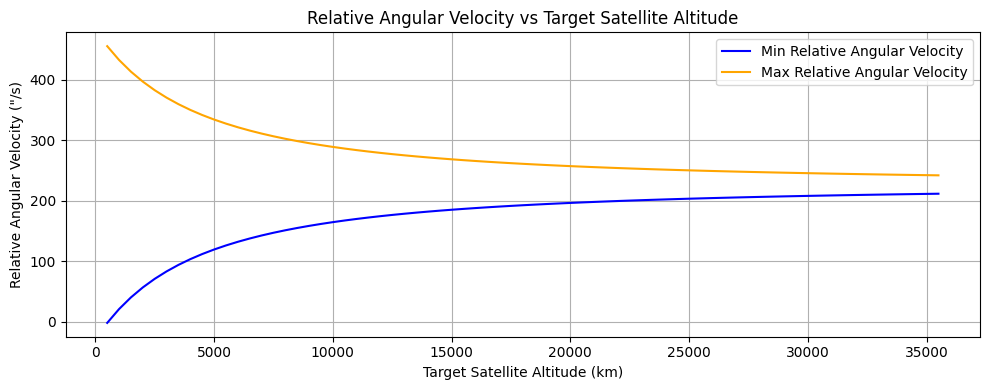

In [66]:
vals = []
for tar_altitude in range(500, 36000, 500):
    tar_ang_vol = 360 * 3600 / cal_sat_period(tar_altitude)
    rela_ang_vol = [sat_ang_vol - tar_ang_vol, tar_ang_vol + sat_ang_vol]
    vals.append(rela_ang_vol)

plt.figure(figsize=(10, 4))
plt.plot(range(500, 36000, 500), [v[0] for v in vals], label='Min Relative Angular Velocity', color='blue')
plt.plot(range(500, 36000, 500), [v[1] for v in vals], label='Max Relative Angular Velocity', color='orange')
plt.title('Relative Angular Velocity vs Target Satellite Altitude')
plt.xlabel('Target Satellite Altitude (km)')
plt.ylabel('Relative Angular Velocity ("/s)')
plt.grid()
plt.legend()
plt.tight_layout()

### GEO目标

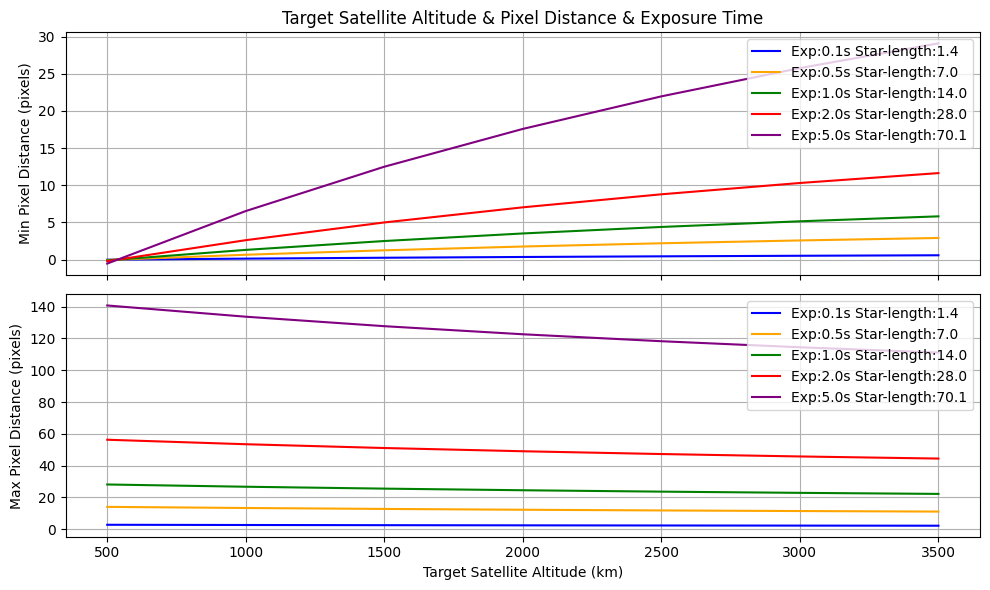

In [86]:
altitudes = range(500, 4000, 500)
exps = [0.1, 0.5, 1, 2, 5]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
for exp in exps:
    # Calculate the pixel distance of stars    
    star_dis = [sat_ang_vol / ang_resolution[0] * exp, sat_ang_vol / ang_resolution[1] * exp]
    # axes[0].axhline(pix_dis[0], color='gray', ls='--')
    # axes[1].axhline(pix_dis[1], color='gray', ls='--')

    # Calculate the pixel distance of targets    
    vals = []
    for tar_altitude in altitudes:
        tar_ang_vol = 360 * 3600 / cal_sat_period(tar_altitude)
        rela_ang_vol = [sat_ang_vol - tar_ang_vol, tar_ang_vol + sat_ang_vol]
        pix_dis = [rela_ang_vol[0] / ang_resolution[0] * exp, rela_ang_vol[1] / ang_resolution[1] * exp]
        vals.append(pix_dis)
    axes[0].plot(altitudes, [v[0] for v in vals], label=f'Exp:{exp:2.1f}s Star-length:{star_dis[0]:.1f}', color=colors[exps.index(exp)], ls='-')
    axes[1].plot(altitudes, [v[1] for v in vals], label=f'Exp:{exp:2.1f}s Star-length:{star_dis[1]:.1f}',color=colors[exps.index(exp)], ls='-')

axes[0].set_ylabel('Min Pixel Distance (pixels)')
axes[1].set_ylabel('Max Pixel Distance (pixels)')
axes[1].set_xlabel('Target Satellite Altitude (km)')
axes[0].grid()
axes[1].grid()
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('Target Satellite Altitude & Pixel Distance & Exposure Time')
fig.tight_layout()

In [89]:
from astropy.io import fits
hdulist = fits.open('./imgs/20220825/evening-flat-CAM1-20220825200704169.fits')
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 9600                                                  
NAXIS2  =                 6422                                                  
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
EXTEND  =                    T                                                  
                                                                                
COMMENT  ---                DATE/TIME                ---                        
DATE-OBS= '2022-08-25T20:07:04.169' / [utc] row 0 exposure start time           
DATE-END= '2022-08-25T20:07:06.726' / [utc] row 0 exposure end time             
TIME-SRC= 'GPS     '        